In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
import re
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Data_BDS_hoanchinh_1.csv',sep=',')
df.head()

,Mã tin,Loại BĐS,Khu vực,Địa chỉ,Diện tích (m2),Pháp lý,Giá (tỷ),Lộ giới (m),Số lầu,Số phòng ngủ,Số điện thoại liên hệ,Link truy cập
0,3500611,"Nhà ngõ, hẻm",Hồ Chí Minh,"Quận 12, Hồ Chí Minh",80.0,Sổ hồng/ Sổ đỏ,6.99,6.0,3,4,0909.822.610,https://i-batdongsan.com/ban-nha-4-tang-nguyen...
1,4659719,Đất,Hà Nội,"Huyện Hoài Đức, Hà Nội",75.0,Sổ hồng/ Sổ đỏ,4.20,5.0,0,0,0914.773.359,https://i-batdongsan.com/ban-dat-o-khu-cao-tru...
2,4813510,Biệt thự,Hà Nội,"Quận Hà Đông, Hà Nội",50.0,Sổ hồng/ Sổ đỏ,12.50,4.0,7,4,0944.723.177,https://i-batdongsan.com/-ban-toa-nha-mat-pho-...
3,4822936,Nhà mặt tiền,Hà Nội,"Quận Hà Đông, Hà Nội",50.0,Sổ hồng/ Sổ đỏ,7.20,4.0,6,10,0944.723.177,https://i-batdongsan.com/-ban-nha-dong-tien-th...
4,4659316,"Nhà ngõ, hẻm",Hồ Chí Minh,"Quận Gò Vấp, Hồ Chí Minh",55.0,Sổ hồng/ Sổ đỏ,5.25,6.0,1,2,0917.166.979,https://i-batdongsan.com/-go-vap-ban-gap-nha-d...


In [3]:
# col_drop = ['Mã tin','Tên','SĐT','Địa chỉ','Link','Khu vực.1']
# df = df.drop(col_drop, axis=1)
col_drop = ['Mã tin', 'Khu vực','Link truy cập', 'Số điện thoại liên hệ']
df = df.drop(col_drop, axis=1)

In [4]:
# for i in range(len(df)):
#     r = df['Địa chỉ'][i]
#     if r.split(', ')[-1] == 'Hà Nội' or r.split(', ')[-1] == 'Hồ Chí Minh':
#         try: 
#             df['Địa chỉ'][i] = re.findall(',[^,]*,([^,]*,[^,]*)', r)[0]
#         except:
#             re.findall(', ([^,]*,[^,]*)', r)[0]
#     else: df['Địa chỉ'][i] = r.split(', ')[-1]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loại BĐS        1916 non-null   object 
 1   Địa chỉ         1916 non-null   object 
 2   Diện tích (m2)  1916 non-null   float64
 3   Pháp lý         1916 non-null   object 
 4   Giá (tỷ)        1916 non-null   float64
 5   Lộ giới (m)     1916 non-null   float64
 6   Số lầu          1916 non-null   int64  
 7   Số phòng ngủ    1916 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 119.9+ KB


In [6]:
df.isna().sum()

Loại BĐS          0
Địa chỉ           0
Diện tích (m2)    0
Pháp lý           0
Giá (tỷ)          0
Lộ giới (m)       0
Số lầu            0
Số phòng ngủ      0
dtype: int64

In [7]:
df.head()

,Loại BĐS,Địa chỉ,Diện tích (m2),Pháp lý,Giá (tỷ),Lộ giới (m),Số lầu,Số phòng ngủ
0,"Nhà ngõ, hẻm","Quận 12, Hồ Chí Minh",80.0,Sổ hồng/ Sổ đỏ,6.99,6.0,3,4
1,Đất,"Huyện Hoài Đức, Hà Nội",75.0,Sổ hồng/ Sổ đỏ,4.20,5.0,0,0
2,Biệt thự,"Quận Hà Đông, Hà Nội",50.0,Sổ hồng/ Sổ đỏ,12.50,4.0,7,4
3,Nhà mặt tiền,"Quận Hà Đông, Hà Nội",50.0,Sổ hồng/ Sổ đỏ,7.20,4.0,6,10
4,"Nhà ngõ, hẻm","Quận Gò Vấp, Hồ Chí Minh",55.0,Sổ hồng/ Sổ đỏ,5.25,6.0,1,2


In [8]:
df.describe()

,Diện tích (m2),Giá (tỷ),Lộ giới (m),Số lầu,Số phòng ngủ
count,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000
mean,258.997912,23.738105,9.715814,3.323069,4.823591
std,1705.088758,46.795106,10.451330,3.492851,7.743485
min,3.000000,0.003000,0.000000,0.000000,0.000000
25%,50.000000,4.500000,2.500000,0.000000,0.000000
50%,72.000000,7.875000,5.000000,3.000000,4.000000
75%,125.000000,24.045000,15.000000,5.000000,5.000000
max,40000.000000,600.000000,60.000000,85.000000,100.000000


In [9]:
# Loại bỏ outlier theo Q1, Q3
Q1 = df['Giá (tỷ)'].quantile(0.25)
Q3 = df['Giá (tỷ)'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Giá (tỷ)'] < (Q1 - 1.5 * IQR)) | (df['Giá (tỷ)'] > (Q3 + 1.5 * IQR)))]
Q1 = df['Diện tích (m2)'].quantile(0.25)
Q3 = df['Diện tích (m2)'].quantile(0.75)
IQR_DT = Q3 - Q1
df = df[~((df['Diện tích (m2)'] < (Q1 - 1.5 * IQR_DT)) | (df['Diện tích (m2)'] > (Q3 + 1.5 * IQR_DT)))]
Q1 = df['Lộ giới (m)'].quantile(0.25)
Q3 = df['Lộ giới (m)'].quantile(0.75)
IQR_LG = Q3 - Q1
df = df[~((df['Lộ giới (m)'] < (Q1 - 1.5 * IQR_LG)) | (df['Lộ giới (m)'] > (Q3 + 1.5 * IQR_LG)))]
Q1 = df['Số lầu'].quantile(0.25)
Q3 = df['Số lầu'].quantile(0.75)
IQR_SL = Q3 - Q1
df = df[~((df['Số lầu'] < (Q1 - 1.5 * IQR_SL)) | (df['Số lầu'] > (Q3 + 1.5 * IQR_SL)))]
Q1 = df['Số phòng ngủ'].quantile(0.25)
Q3 = df['Số phòng ngủ'].quantile(0.75)
IQR_PN = Q3 - Q1
df = df[~((df['Số phòng ngủ'] < (Q1 - 1.5 * IQR_PN)) | (df['Số phòng ngủ'] > (Q3 + 1.5 * IQR_PN)))]
df.shape

(1305, 8)

In [10]:
df['Loại BĐS'].value_counts()


Nhà ngõ, hẻm           777
Nhà mặt tiền           338
Đất                    123
Biệt thự                30
Căn hộ chung cư         12
Nhà hàng, khách sạn      9
Đất nền, phân lô         7
Văn phòng                4
Phòng trọ, nhà trọ       4
Các loại khác            1
Name: Loại BĐS, dtype: int64

In [11]:
df.hist

<bound method hist_frame of              Loại BĐS                     Địa chỉ  Diện tích (m2)  \
0        Nhà ngõ, hẻm        Quận 12, Hồ Chí Minh            80.0   
1                 Đất      Huyện Hoài Đức, Hà Nội            75.0   
2            Biệt thự        Quận Hà Đông, Hà Nội            50.0   
3        Nhà mặt tiền        Quận Hà Đông, Hà Nội            50.0   
4        Nhà ngõ, hẻm    Quận Gò Vấp, Hồ Chí Minh            55.0   
...               ...                         ...             ...   
1908     Nhà ngõ, hẻm        Quận Hà Đông, Hà Nội            50.0   
1910     Nhà ngõ, hẻm         Quận Tây Hồ, Hà Nội            63.0   
1911     Nhà mặt tiền     Quận Thanh Xuân, Hà Nội            35.0   
1913     Nhà ngõ, hẻm        Quận Đống Đa, Hà Nội            52.0   
1914  Căn hộ chung cư   Quận Hai Bà Trưng, Hà Nội            18.0   

             Pháp lý  Giá (tỷ)  Lộ giới (m)  Số lầu  Số phòng ngủ  
0     Sổ hồng/ Sổ đỏ     6.990          6.0       3             4  
1     S

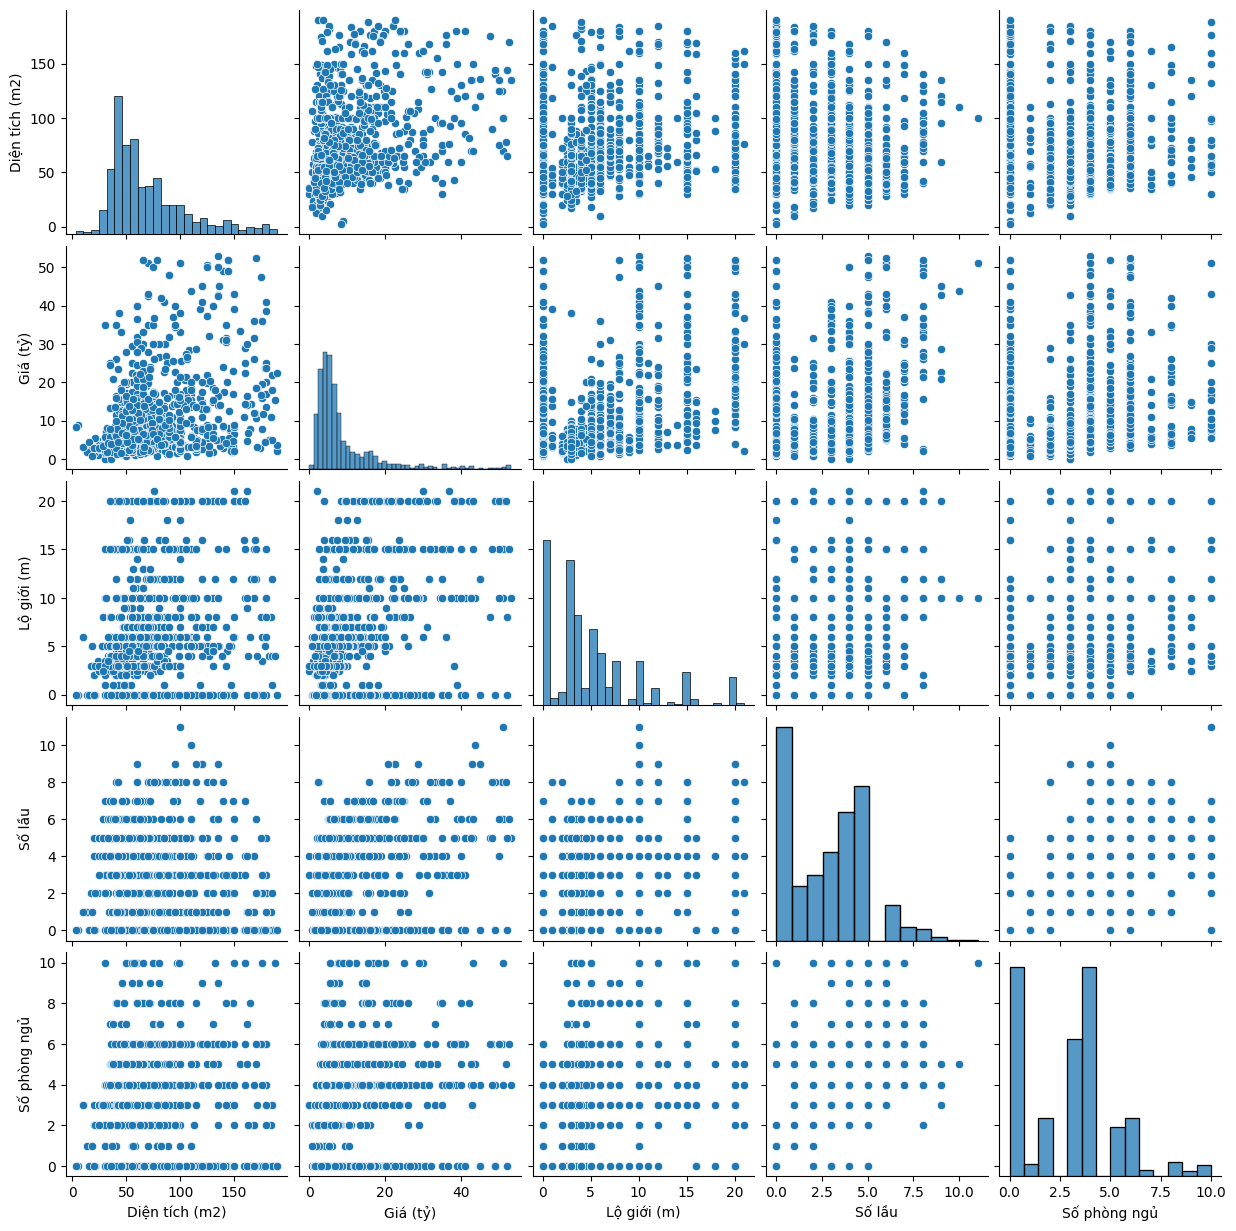

In [12]:
sns.pairplot(df)

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')
mappings = {}

for col in object_columns:
    vals = df[col].cat.categories
    mappings[col] = {val: i for i, val in enumerate(vals)}

    df[col] = df[col].cat.codes

In [14]:
df['Loại BĐS'].value_counts()

5    777
4    338
8    123
0     30
2     12
3      9
9      7
7      4
6      4
1      1
Name: Loại BĐS, dtype: int64

<AxesSubplot:>

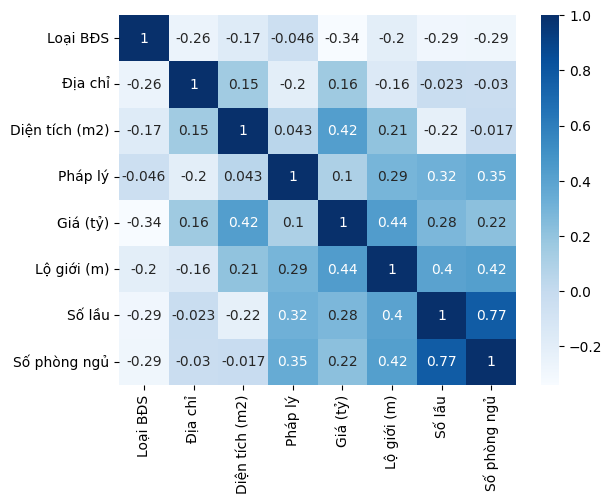

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [16]:
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.drop('Giá (tỷ)', axis=1)
y = df['Giá (tỷ)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=35)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))


0.8618149202520453


In [17]:
# from sklearn.model_selection import GridSearchCV
# LR = { 'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005], 'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]}
# tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=LR, scoring = 'r2')
# tuning.fit(X_train, y_train)
# tuning.best_params_, tuning.best_score_

In [18]:
def decode(column_name, code):
    return mappings[column_name][code]

In [19]:
# object_columns = df.select_dtypes(include=['object']).columns
# df[object_columns] = df[object_columns].astype('category')
# mappings = {}

# for col in object_columns:
#     vals = df[col].cat.categories
#     mappings[col] = {val: i for i, val in enumerate(vals)}

#     df[col] = df[col].cat.codes

In [22]:
# viết hàm predict giá nhà
loai_bds = decode('Loại BĐS', 'Nhà ngõ, hẻm')
dia_chi = decode('Địa chỉ', ' Quận Gò Vấp, Hồ Chí Minh')
phap_ly = decode('Pháp lý', 'Sổ hồng/ Sổ đỏ')
input_data = pd.DataFrame({
    'Loại BĐS': [loai_bds],
    'Địa chỉ': [dia_chi], 
    'Diện tích (m2)': [60],
    'Pháp lý': [phap_ly],
    'Lộ giới (m)': [4],
    'Số lầu': [3],
    'Số phòng ngủ': [5]
})
y_pred = model.predict(input_data)
print('Giá nhà dự đoán: ', round(y_pred[0],2), 'tỷ')

Giá nhà dự đoán:  6.49 tỷ
